In [193]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [194]:
import sys
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from numba import njit, prange

In [195]:
from analysis_routines import * 
from harmonic_analysis import *
from utide import solve
from plotting_routines_xr import *
plt.style.use('/home/manu/TFG_repo/notebooks/mplstyles/notebook.mplstyle')

In [196]:
df_ci = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
df_c = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fc.csv')
df_s = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_s.csv')

In [197]:
data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')

In [198]:
QI_ici = pd.read_csv(data_dir / 'SHDR_fit/aux/QI_ici_20181116.csv', index_col='date', parse_dates=True)
QI_itrsh = pd.read_csv(data_dir / 'SHDR_fit/aux/QI_itrsh_20181116.csv', index_col='date', parse_dates=True)
QI_is = pd.read_csv(data_dir / 'SHDR_fit/aux' / 'QI_is_20181116.csv', index_col='date', parse_dates=True)

em_ci = np.load(data_dir / 'SHDR_fit/aux/AGL_20181116_ci_fit_real_em.npy')
df_em_ci = pd.DataFrame(em_ci, index=data.date, )
mld_thresh_i_02 = pd.read_csv(data_dir / 'SHDR_fit/aux' / 'MLD_trsh_02_i.csv', index_col='date', parse_dates=True)

In [199]:
df_em_ci = pd.DataFrame({'x': em_ci}, index=data.date)

In [200]:

low = period_to_freq(1.1*12.42, 'h')
high = period_to_freq(0.9*12.42, 'h')
em_ci_bandpass_M2 = bandpass_filter(df_em_ci.x, data.date, 1/5, low, high)
D1_bandpass_M2 = bandpass_filter(df_ci.D1, data.date, 1/5, low, high)


In [201]:
plot_arbitrary_variable(em_ci_bandpass_M2, period=period_1, type='plot')

TypeError: plot_arbitrary_variable() got an unexpected keyword argument 'type'

In [ ]:
plot_D1_and_G005(D1_bandpass_M2, em_ci_bandpass_M2, period=period_1)

[50.0625     87.63194444]
5.85
87.63194444444444


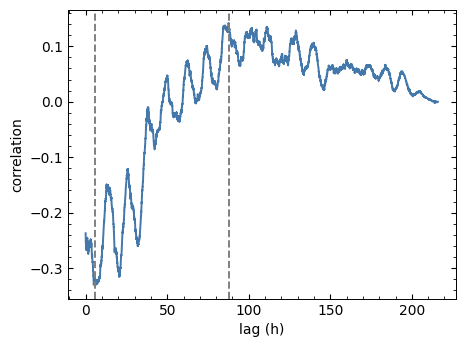

In [17]:
lag_correlation(df_ci.D1, df_em_ci, period=period_2)

In [302]:
coef_QI = coef_dataframe(df_em_ci.x, period=period_3)

In [303]:
coef_QI

,period,PE,SNR,A,A_ci,g,g_ci
name,,,,,,,
M2,12.420601,31.110340,7.795291,0.003180,0.002232,251.987331,40.389894
2MK5,4.930880,29.791180,13.972262,0.003112,0.001632,119.498436,30.047707
M4,6.210301,13.256529,1.905823,0.002076,0.002947,309.544726,81.392479
K1,23.934470,11.359708,0.619002,0.001922,0.004787,106.875732,142.226394
M6,4.140200,4.826759,9.449405,0.001253,0.000799,45.216661,36.532507
M3,8.280401,4.458191,0.915177,0.001204,0.002466,164.680940,117.171748
2SK5,4.797373,4.037733,1.892257,0.001146,0.001632,245.246780,81.586460
3MK7,3.529641,1.121137,0.679171,0.000604,0.001436,335.284599,136.328856
M8,3.105150,0.038423,0.036640,0.000112,0.001144,103.727038,586.641087


In [292]:
freqs, psd, dof = windowed_spectrum(df_em_ci.x, 5/60/60/24, 28, 6)

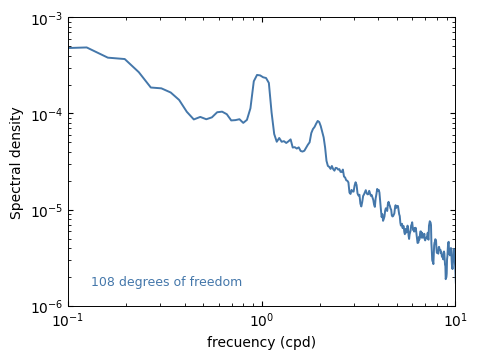

In [293]:
plot_spectrum(freqs, psd, dof, 'cpd', xlim=(1e-1, 1e1), ylim=(1e-6, 1e-3))

In [14]:
# dates defining_periods
date_0 = datetime(2018, 11, 16, 11) # period_1
date_1 = datetime(2018, 11, 24)
period_1 = [date_0, date_1]

date_2 = datetime(2018, 11, 30) # period_2
date_3 = datetime(2018, 12, 9)
period_2 = [date_2, date_3]

date_4 = datetime(2019, 1, 5) # period_3
date_5 = datetime(2019, 1, 14)
period_3 = [date_4, date_5]

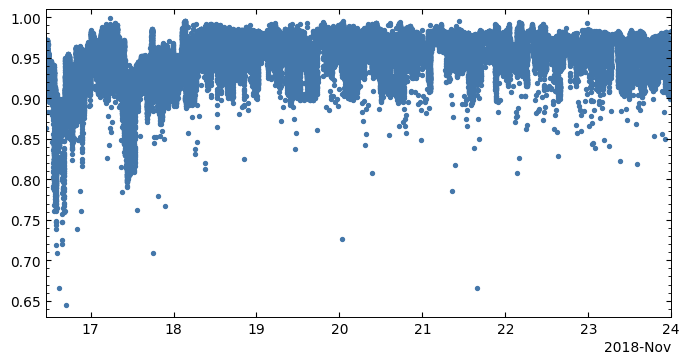

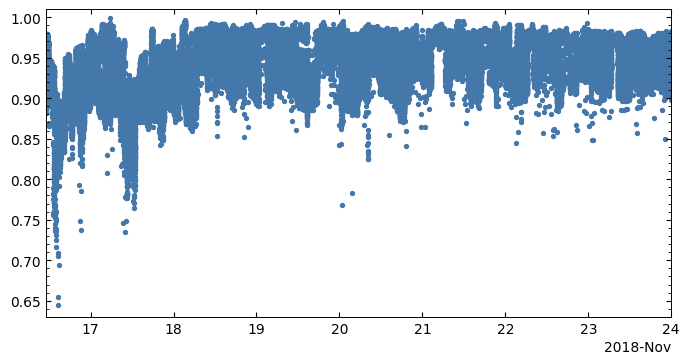

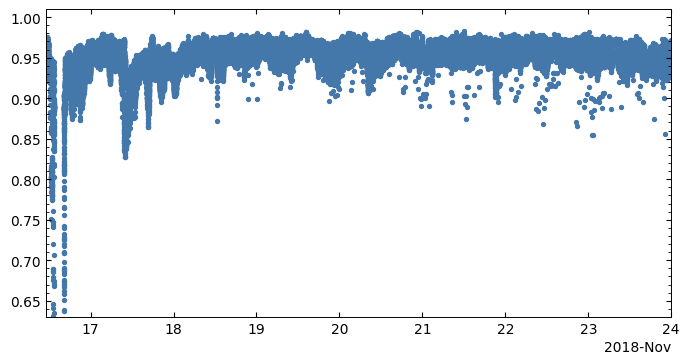

In [93]:
plot_arbitrary_variable(QI_ici.x, period=[datetime(2018, 11, 16), datetime(2018, 11, 24)], ylim=(0.63, 1.01))
plot_arbitrary_variable(QI_is.x, period=[datetime(2018, 11, 16), datetime(2018, 11, 24)], ylim=(0.63, 1.01))

plot_arbitrary_variable(QI_itrsh.x, period=[datetime(2018, 11, 16), datetime(2018, 11, 24)], ylim=(0.63, 1.01))


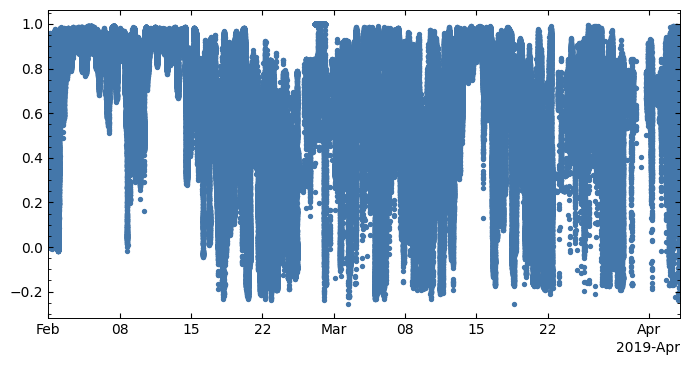

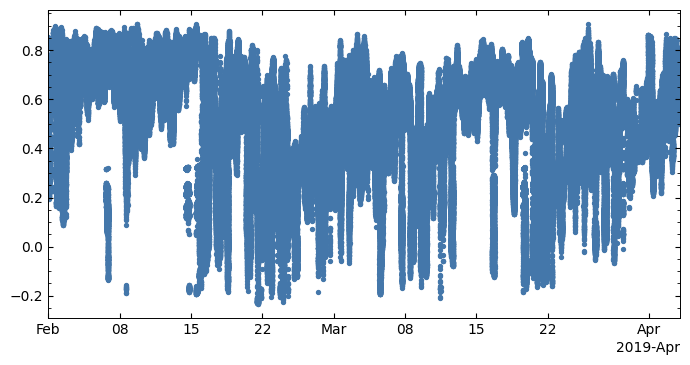

In [102]:
plot_arbitrary_variable(QI_ici.x, period=[datetime(2019, 2, 1), datetime(2019, 4, 4)])
plot_arbitrary_variable(QI_itrsh.x, period=[datetime(2019, 2, 1), datetime(2019, 4, 4)])

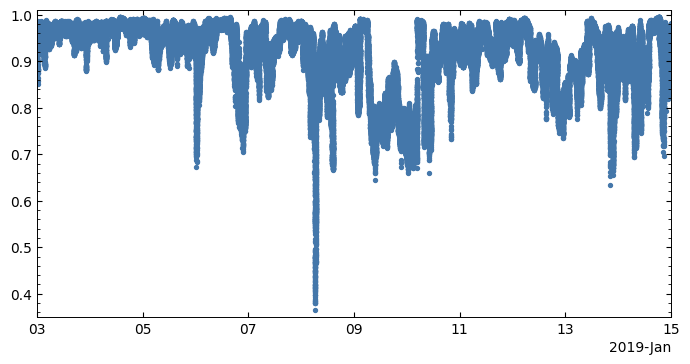

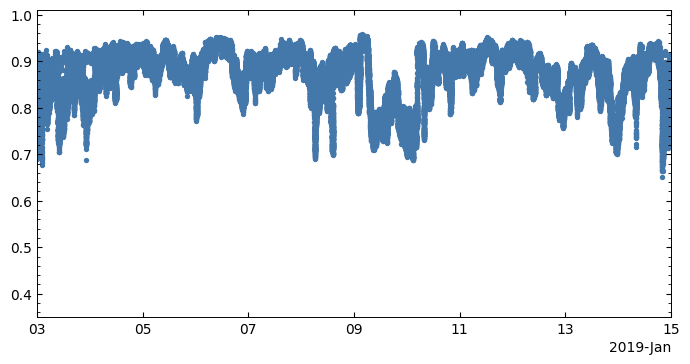

In [76]:
plot_arbitrary_variable(QI_ici.x, period=[datetime(2019, 1, 3), datetime(2019, 1, 15)], ylim=(0.35, 1.01))
plot_arbitrary_variable(QI_itrsh.x, period=[datetime(2019, 1, 3), datetime(2019, 1, 15)], ylim=(0.35, 1.01))

In [ ]:
em_ci = np.load(data_dir / 'SHDR_fit/aux/AGL_20181116_ci_fit_real_em.npy')
mld_thresh_i_02 = np.load(data_dir / 'SHDR_fit/aux/02_threshold_i_20181116.npy')

In [ ]:
plot_fit_variable(df_s, 'D1', period=[datetime(2019, 2, 1), datetime(2019, 3, 1)])

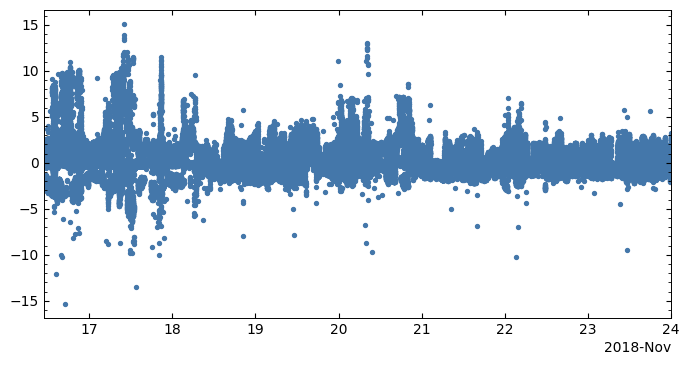

In [149]:
plot_arbitrary_variable(df_s.D1 - df_ci.D1, period=period_1)

In [148]:
np.mean(df_s.D1[period_1[0]:period_1[1]] - df_ci.D1[period_1[0]:period_1[1]])

0.2811754817585919

In [ ]:
display_video()

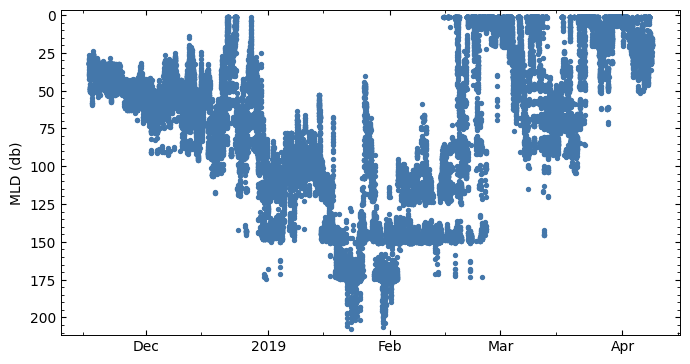

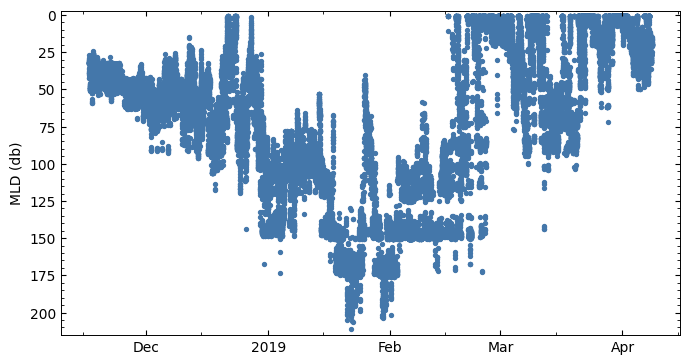

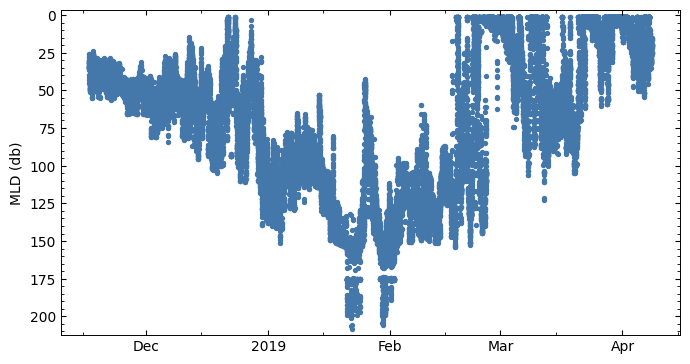

In [7]:
plot_fit_variable(df_s, 'D1', period=[None, None, 60])
plot_fit_variable(df_c, 'D1', period=[None, None, 60])
plot_fit_variable(df_ci, 'D1', period=[None, None, 60])

### Distance


In [203]:
locs_5_s, ratio_5_s = distance(df_s, 'D1', 1, 5)
locs_10_s, ratio_10_s = distance(df_s, 'D1', 1, 10)
locs_15_s, ratio_15_s = distance(df_s, 'D1', 1, 15)
locs_5_c, ratio_5_c = distance(df_c, 'D1', 1, 5)
locs_10_c, ratio_10_c = distance(df_c, 'D1', 1, 10)
locs_15_c, ratio_15_c = distance(df_c, 'D1', 1, 15)
locs_5_ci, ratio_5_ci = distance(df_ci, 'D1', 1, 5)
locs_10_ci, ratio_10_ci = distance(df_ci, 'D1', 1, 10)
locs_15_ci, ratio_15_ci = distance(df_ci, 'D1', 1, 15)

ratios_5 = np.array([ratio_5_s, ratio_5_c, ratio_5_ci])*100
ratios_10 = np.array([ratio_10_s, ratio_10_c, ratio_10_ci])*100
ratios_15 = np.array([ratio_15_s, ratio_15_c, ratio_15_ci])*100
total_ratios = [ratios_5, ratios_10, ratios_15]

In [ ]:
p1_locs_5_s, p1_ratio_5_s = distance(df_s, 'D1', 1, 5, period=period_1)
p1_locs_10_s, p1_ratio_10_s = distance(df_s, 'D1', 1, 10, period=period_1)
p1_locs_15_s, p1_ratio_15_s = distance(df_s, 'D1', 1, 15, period=period_1)
p1_locs_5_c, p1_ratio_5_c = distance(df_c, 'D1', 1, 5, period=period_1)
p1_locs_10_c, p1_ratio_10_c = distance(df_c, 'D1', 1, 10, period=period_1)
p1_locs_15_c, p1_ratio_15_c = distance(df_c, 'D1', 1, 15, period=period_1)
p1_locs_5_ci, p1_ratio_5_ci = distance(df_ci, 'D1', 1, 5, period=period_1)
p1_locs_10_ci, p1_ratio_10_ci = distance(df_ci, 'D1', 1, 10, period=period_1)
p1_locs_15_ci, p1_ratio_15_ci = distance(df_ci, 'D1', 1, 15, period=period_1)

p1_ratios_5 = np.array([p1_ratio_5_s, p1_ratio_5_c, p1_ratio_5_ci])*100
p1_ratios_10 = np.array([p1_ratio_10_s, p1_ratio_10_c, p1_ratio_10_ci])*100
p1_ratios_15 = np.array([p1_ratio_15_s, p1_ratio_15_c, p1_ratio_15_ci])*100
p1_ratios = [p1_ratios_5, p1_ratios_10, p1_ratios_15]

In [ ]:
p2_locs_5_s, p2_ratio_5_s = distance(df_s, 'D1', 1, 5, period=period_2)
p2_locs_10_s, p2_ratio_10_s = distance(df_s, 'D1', 1, 10, period=period_2)
p2_locs_15_s, p2_ratio_15_s = distance(df_s, 'D1', 1, 15, period=period_2)
p2_locs_5_c, p2_ratio_5_c = distance(df_c, 'D1', 1, 5, period=period_2)
p2_locs_10_c, p2_ratio_10_c = distance(df_c, 'D1', 1, 10, period=period_2)
p2_locs_15_c, p2_ratio_15_c = distance(df_c, 'D1', 1, 15, period=period_2)
p2_locs_5_ci, p2_ratio_5_ci = distance(df_ci, 'D1', 1, 5, period=period_2)
p2_locs_10_ci, p2_ratio_10_ci = distance(df_ci, 'D1', 1, 10, period=period_2)
p2_locs_15_ci, p2_ratio_15_ci = distance(df_ci, 'D1', 1, 15, period=period_2)

p2_ratios_5 = np.array([p2_ratio_5_s, p2_ratio_5_c, p2_ratio_5_ci])*100
p2_ratios_10 = np.array([p2_ratio_10_s, p2_ratio_10_c, p2_ratio_10_ci])*100
p2_ratios_15 = np.array([p2_ratio_15_s, p2_ratio_15_c, p2_ratio_15_ci])*100
p2_ratios = [p2_ratios_5, p2_ratios_10, p2_ratios_15]

In [ ]:
p3_locs_5_s, p3_ratio_5_s = distance(df_s, 'D1', 1, 5, period=period_3)
p3_locs_10_s, p3_ratio_10_s = distance(df_s, 'D1', 1, 10, period=period_3)
p3_locs_15_s, p3_ratio_15_s = distance(df_s, 'D1', 1, 15, period=period_3)
p3_locs_5_c, p3_ratio_5_c = distance(df_c, 'D1', 1, 5, period=period_3)
p3_locs_10_c, p3_ratio_10_c = distance(df_c, 'D1', 1, 10, period=period_3)
p3_locs_15_c, p3_ratio_15_c = distance(df_c, 'D1', 1, 15, period=period_3)
p3_locs_5_ci, p3_ratio_5_ci = distance(df_ci, 'D1', 1, 5, period=period_3)
p3_locs_10_ci, p3_ratio_10_ci = distance(df_ci, 'D1', 1, 10, period=period_3)
p3_locs_15_ci, p3_ratio_15_ci = distance(df_ci, 'D1', 1, 15, period=period_3)

p3_ratios_5 = np.array([p3_ratio_5_s, p3_ratio_5_c, p3_ratio_5_ci])*100
p3_ratios_10 = np.array([p3_ratio_10_s, p3_ratio_10_c, p3_ratio_10_ci])*100
p3_ratios_15 = np.array([p3_ratio_15_s, p3_ratio_15_c, p3_ratio_15_ci])*100
p3_ratios = [p3_ratios_5, p3_ratios_10, p3_ratios_15]

In [ ]:
D1_s = df_s['D1'].to_numpy()
D1_c = df_c['D1'].to_numpy()
D1_ci = df_ci['D1'].to_numpy()

distances_10_s = D1_s[locs_10_s + 1] - D1_s[locs_10_s]
date_s = data.date[locs_10_s]

distances_10_c = D1_c[locs_10_c + 1] - D1_c[locs_10_c]
date_c = data.date[locs_10_c]

distances_10_ci = D1_ci[locs_10_ci + 1] - D1_ci[locs_10_ci]
date_ci = data.date[locs_10_ci]

def plot_distances(df, variable, locs=None, period=[None, None]):
    
    locator = mdates.AutoDateLocator(minticks=3, maxticks=None)
    formatter = mdates.ConciseDateFormatter(locator)
    minor_locator = mdates.AutoDateLocator(minticks=6)
    
    i_0 = np.searchsorted(locs, lims[0])
    i_f = np.searchsorted(locs, lims[1])
    locs = locs[i_0:i_f]
    arr_variable = df[variable].to_numpy()
    
    
    distances = arr_variable[locs + 1] - arr_variable[locs] 
    date_d = df['date'].to_numpy()[locs]
    
    fig, ax = plt.subplots(figsize=(7, 3.75))
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    ax.xaxis.set_minor_locator(locator)

    ax.scatter(date_d, distances)
    fig.tight_layout()
    plt.show()
    return distances

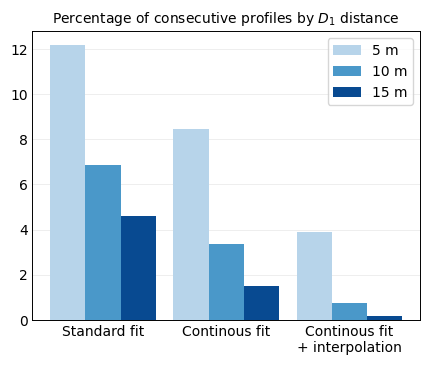

In [110]:
fig, ax = plt.subplots()
x = np.array([0, 1.4, 2.8])
bar_width = 0.4
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))
b1 = ax.bar(x, ratios_5, width=bar_width, label='5 m', color=colors[0])
b2 = ax.bar(x + bar_width, ratios_10, width=bar_width, label='10 m', color=colors[1])
b3 = ax.bar(x + bar_width*2, ratios_15, width=bar_width, label='15 m', color=colors[2])
ax.tick_params(which='both', bottom=False, left=False, right=False, top=False)
ax.set_axisbelow(True)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(['Standard fit', 'Continous fit', 'Continous fit\n+ interpolation'])
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.legend()
ax.set_title('Percentage of consecutive profiles by $D_1$ distance')
plt.show()

In [207]:
plot_distance_ratios(total_ratios, 'Percentage of consecutive profiles by $D_1$ distance')
plot_distance_ratios(p1_ratios, 'Period 1')
plot_distance_ratios(p2_ratios, 'Period 2')
plot_distance_ratios(p3_ratios, 'Period 3')

NameError: name 'plot_distance_ratios' is not defined

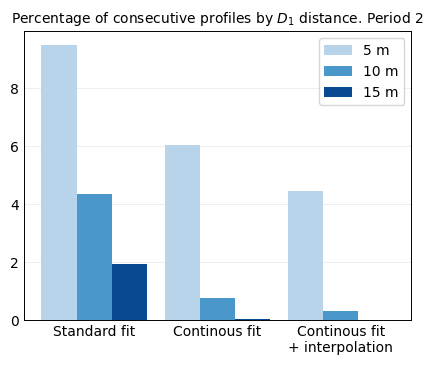

In [118]:
fig, ax = plt.subplots()
x = np.array([0, 1.4, 2.8])
bar_width = 0.4
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))
b1 = ax.bar(x, p2_ratios_5, width=bar_width, label='5 m', color=colors[0])
b2 = ax.bar(x + bar_width, p2_ratios_10, width=bar_width, label='10 m', color=colors[1])
b3 = ax.bar(x + bar_width*2, p2_ratios_15, width=bar_width, label='15 m', color=colors[2])
ax.tick_params(which='both', bottom=False, left=False, right=False, top=False)
ax.set_axisbelow(True)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(['Standard fit', 'Continous fit', 'Continous fit\n+ interpolation'])
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.legend()
ax.set_title('Percentage of consecutive profiles by $D_1$ distance. Period 2')
plt.show()

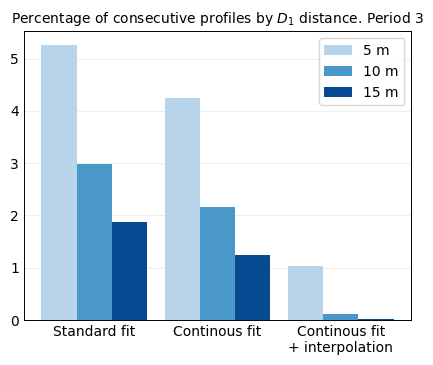

In [117]:
fig, ax = plt.subplots()
x = np.array([0, 1.4, 2.8])
bar_width = 0.4
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))
b1 = ax.bar(x, p3_ratios_5, width=bar_width, label='5 m', color=colors[0])
b2 = ax.bar(x + bar_width, p3_ratios_10, width=bar_width, label='10 m', color=colors[1])
b3 = ax.bar(x + bar_width*2, p3_ratios_15, width=bar_width, label='15 m', color=colors[2])
ax.tick_params(which='both', bottom=False, left=False, right=False, top=False)
ax.set_axisbelow(True)
ax.set_xticks(x + bar_width)
ax.set_xticklabels(['Standard fit', 'Continous fit', 'Continous fit\n+ interpolation'])
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.legend()
ax.set_title('Percentage of consecutive profiles by $D_1$ distance. Period 3')
plt.show()

In [22]:
em_smaller_ci = np.where(em_ci < df_s['em'])[0]
isolated_locs_15_s = locs_15_s[1:][(locs_15_s[1:] - locs_15_s[:-1] != 1)]
print('Porcentaje de perfiles que difieren en más de 15 metros consecutivamente {:.1f}'.format(
    len(isolated_locs_15_s)/len(locs_15_s)*100))

distance_smaller_ci = locs_15_s[(np.in1d(locs_15_s, locs_15_ci) == False)]
distance_smaller_and_em_smaller = np.where(np.in1d(em_smaller_ci, distance_smaller_ci) == True)[0]

print('Porcentaje de perfiles ajustados c+i que disminuyen la distancia entre perfiles {:.2f}'.format(
    len(distance_smaller_and_em_smaller)/len(em_smaller_ci)))

em_s = df_s['em'].to_numpy()
em_jumps_s = np.where(em_s[1:] - em_s[:-1] > em_s.std())[0]
ratio_em_jumps_s_better_ci = len(np.where(np.in1d(em_jumps_s+1, em_smaller_ci) == True)[0])/len(em_jumps_s)
print(ratio_em_jumps_s_better_ci)


Porcentaje de perfiles que difieren en más de 15 metros consecutivamente 51.0
Porcentaje de perfiles ajustados c+i que disminuyen la distancia entre perfiles 0.29
0.5810348439354793


In [29]:
c_smaller_ci = np.where(df_c['em'] < df_s['em'])[0]
print(len(c_smaller_ci)/len(df_ci))
print(len(em_smaller_ci)/len(df_ci))

0.25149036377785716
0.051742160490254915


In [26]:
def compare_fit_modes_profile(df_s, df_c, df_ci, data, date_i, xlim=None):
    if isinstance(date_i, (int, np.integer)):
        data_i = data.isel(date=date_i)
        fit_s = df_s.iloc[date_i]
        fit_c = df_c.iloc[date_i]
        fit_ci = df_ci.iloc[date_i]
        
    else:
        data_i = data.sel(date=date_i)
        fit_s = df_s.loc[date_i]
        fit_c = df_c.loc[date_i]
        fit_ci = df_ci.loc[date_i]
    
    
    pres_i = data_i.meassured_depth
    temp_i = data_i.temp
    date_i_str = np.datetime_as_string(data_i.date, unit='s')

    pres_i = pres_i[np.isfinite(temp_i)]
    temp_i = temp_i[np.isfinite(temp_i)]

    zz = np.linspace(1, pres_i[-1] + 5, 300)

    fig, ax = plt.subplots(figsize=(4, 4.6875))
    colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
    ax.scatter(temp_i, pres_i, marker='o', fc='None', ec=colors[1], s=24)
    ax.set_ylim(pres_i[-1] + 10, 0)

    if xlim is None:
        ax.set_xlim(11, 16)
    
    else:
        ax.set_xlim(*xlim)

    ax.plot(fit_function(zz, df_s, date_i), zz, lw=1, c=colors[2], label='s')
    ax.plot(fit_function(zz, df_c, date_i), zz, lw=1, c=colors[0], label='c')
    ax.plot(fit_function(zz, df_ci, date_i), zz, lw=1, c=colors[1], label='ci')
    
    ax.axhline(fit_s.D1, ls='--', c=colors[2])
    ax.axhline(fit_c.D1, ls='--', c=colors[0])
    ax.axhline(fit_ci.D1, ls='--', c=colors[1])

    
    ax.set_xlabel('Temperature (ºC)')
    ax.set_ylabel('Depth (db)')
    ax.set_title(date_i_str)
    ax.legend()
    fig.tight_layout()
    plt.show()

In [42]:
display_video('perfil_anomalo.mp4')

thrsh 0.8896850461381526 0.8946526296805042
0.8812947485386077 0.9109817761225448


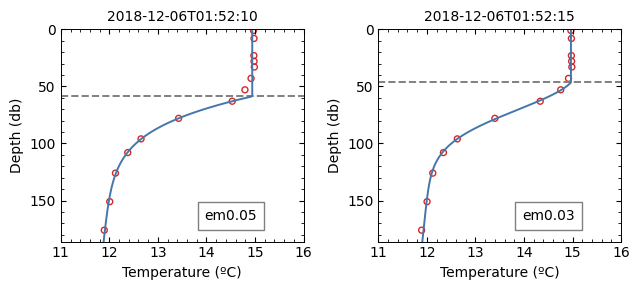

----


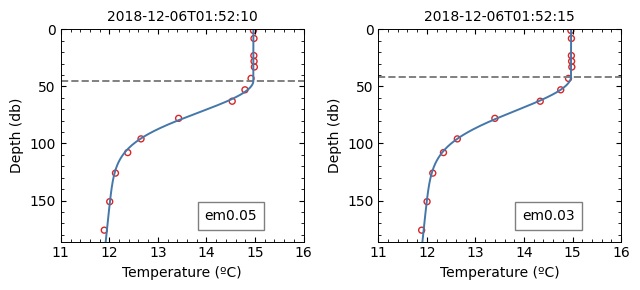

----
0.8900431667465418 0.9341359591323868


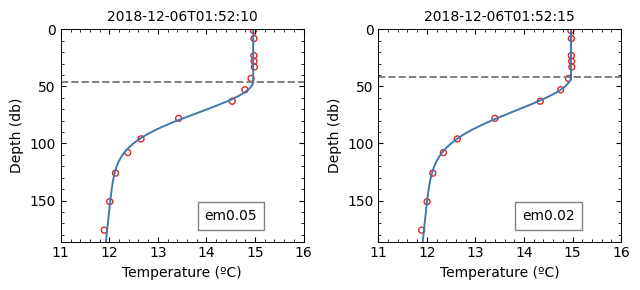

thrsh 0.6598781604100554 0.6728194342863701
0.8000915214544935 0.8041574064845853


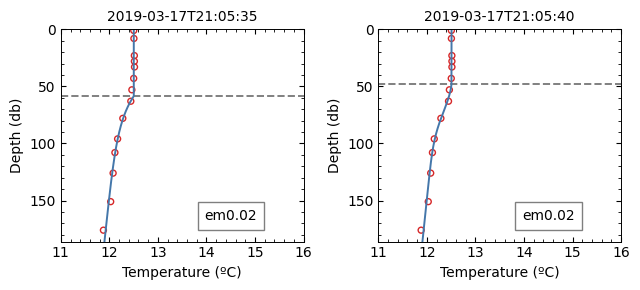

----


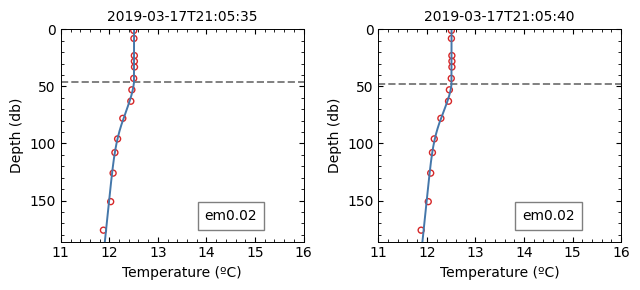

----
0.8074443123363377 0.7763352539149622


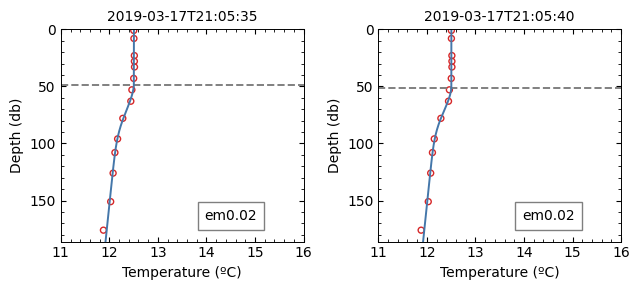

thrsh -0.1154533390644729 -0.0993639503098715
0.2233672411772062 0.564965741588527


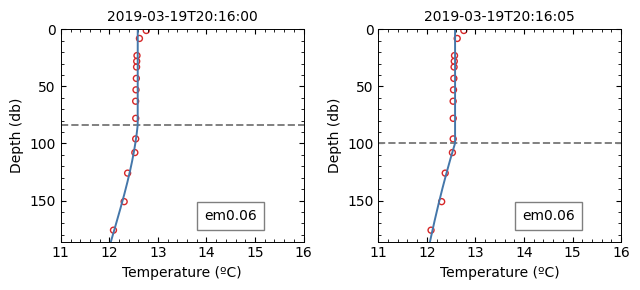

----


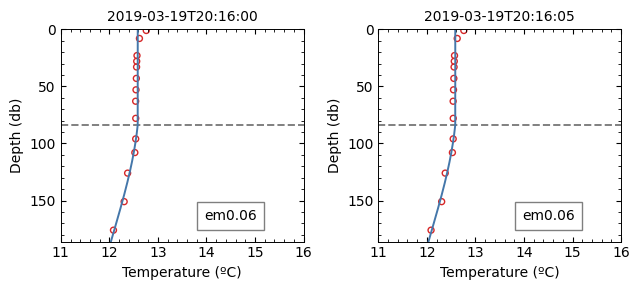

----
0.4918066448749815 0.4773372402372685


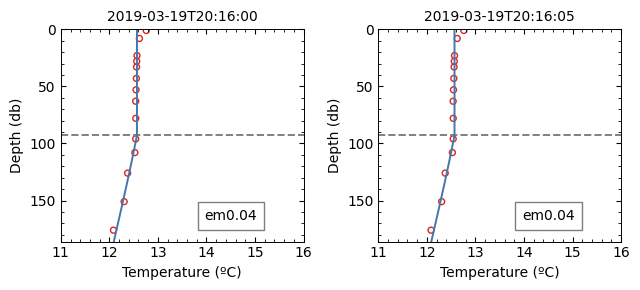

thrsh 0.0460534753293638 0.0464979446326554
0.5721452024899101 0.3663540169123593


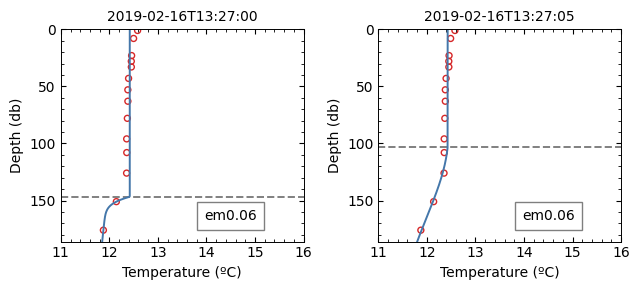

----


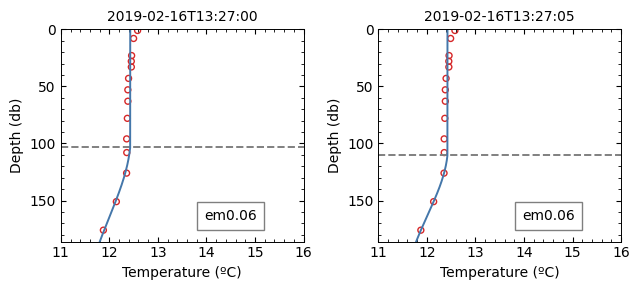

----
0.5824536561696286 0.5987186622804501


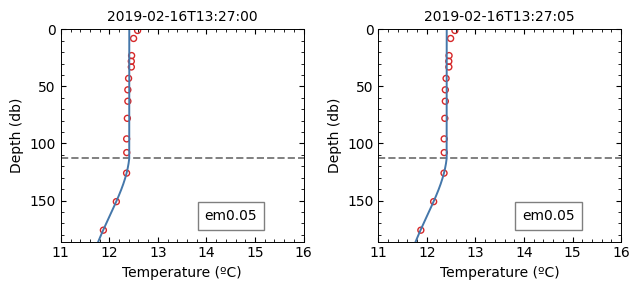

thrsh 0.1720072723333049 0.2242430613017002
0.5890077771286952 0.6801489797777998


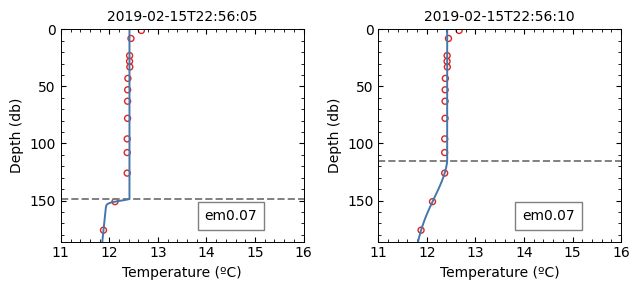

----


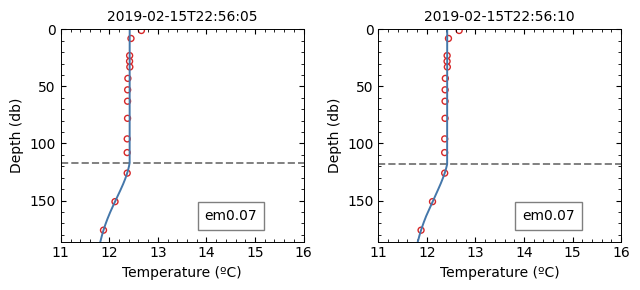

----
0.708924191853993 0.7046640895546263


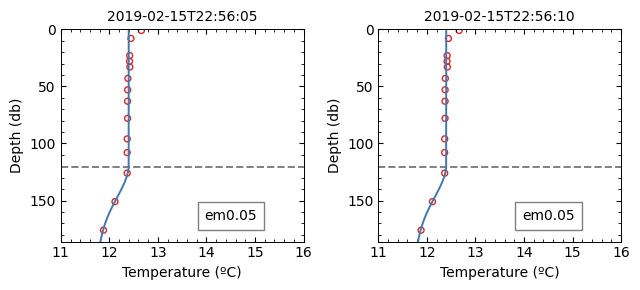

thrsh 0.7117144271684026 0.7054790233193058
0.925814259140394 0.7598684143119512


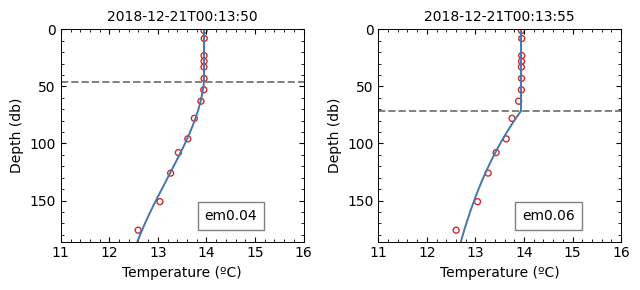

----


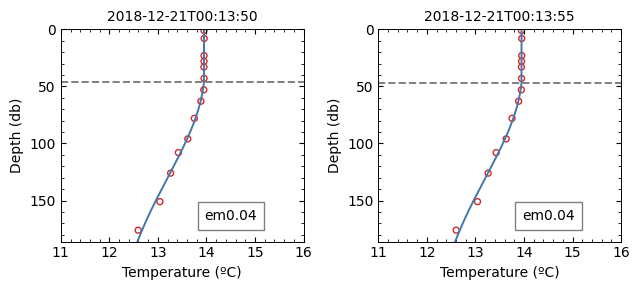

----
0.9486256846363628 0.914536863813199


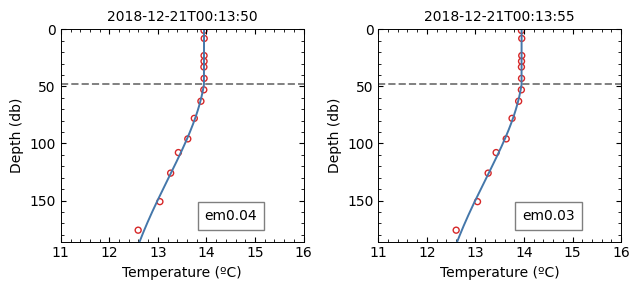

thrsh 0.7462315760751238 0.7318169722713914
0.7387940272941433 0.5309161857226398


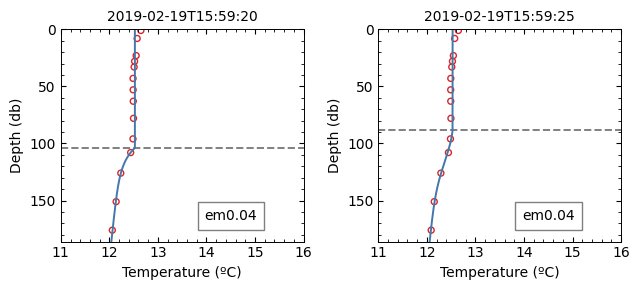

----


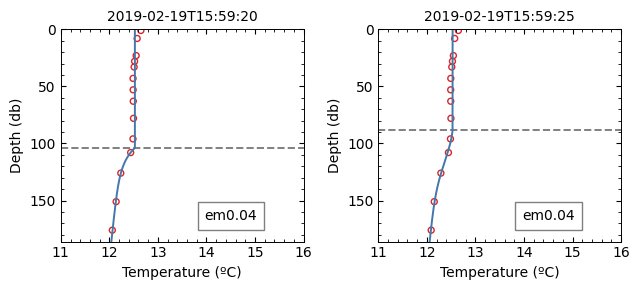

----
0.704583612042243 0.6088700022601485


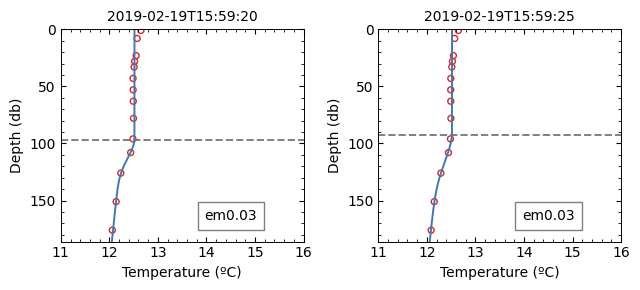

thrsh 0.6965658589778438 0.6910666636906335
0.8415030864772385 0.5450287297576762


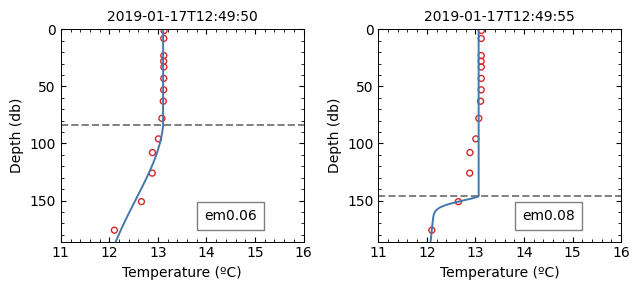

----


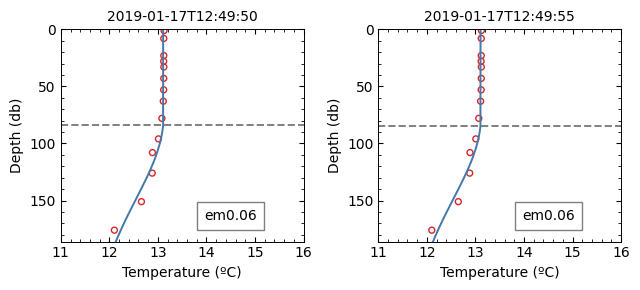

----
0.8215891120237048 0.7783532092477398


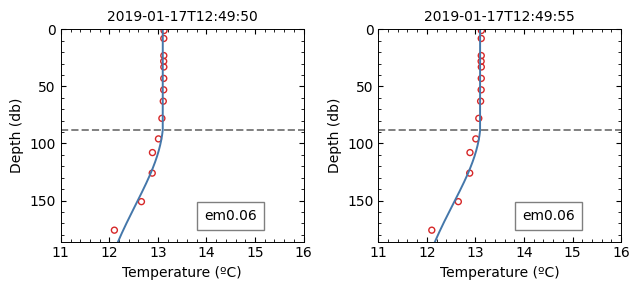

thrsh 0.4066018955847548 0.3989630243116326
0.3073583882919408 0.7574323060595229


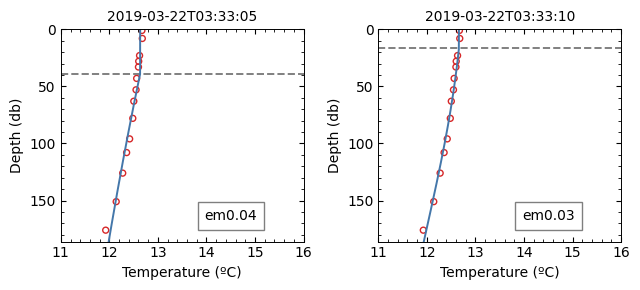

----


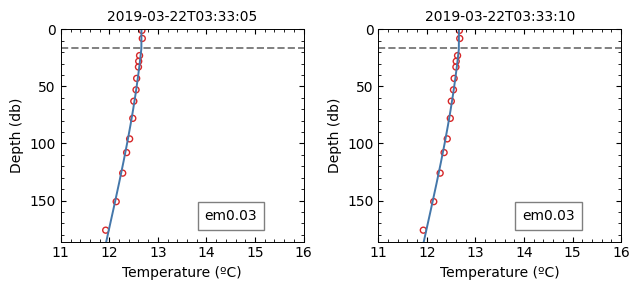

----
0.4622768590647659 0.7218350417452417


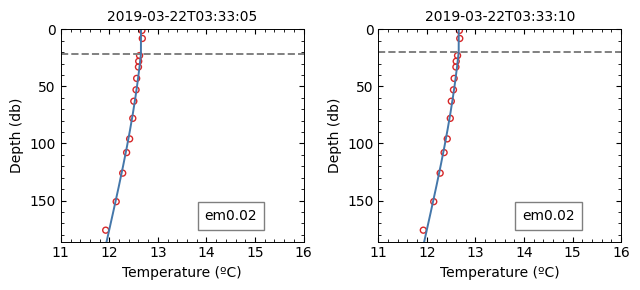

thrsh nan 0.0292814331735387
nan 0.4437256193913429


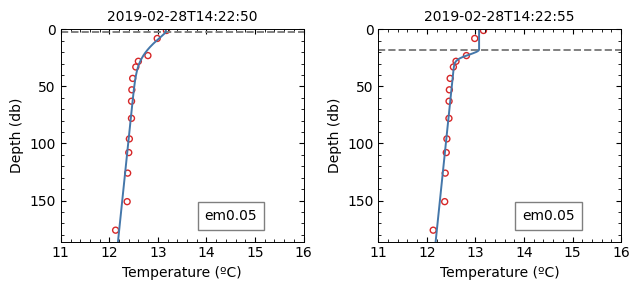

----


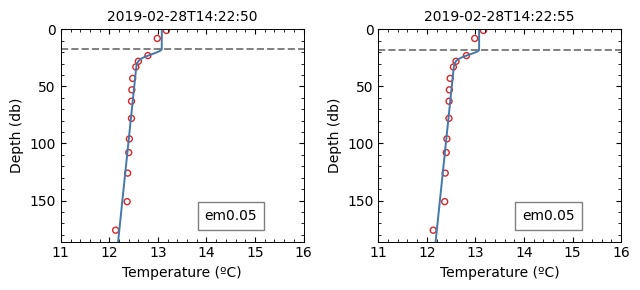

----
0.0463620297909688 0.0780828092851418


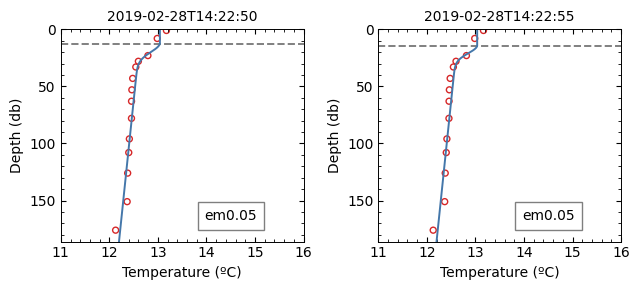

thrsh 0.7726244973957471 0.7721106048557511
0.7691097396030872 0.5360769991366818


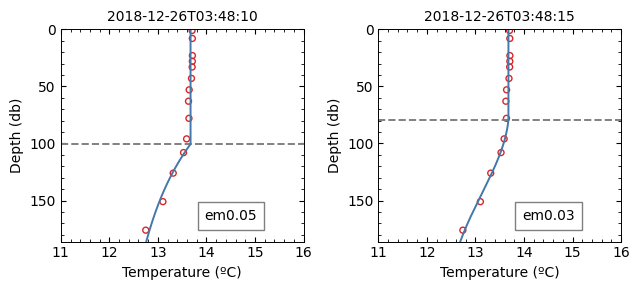

----


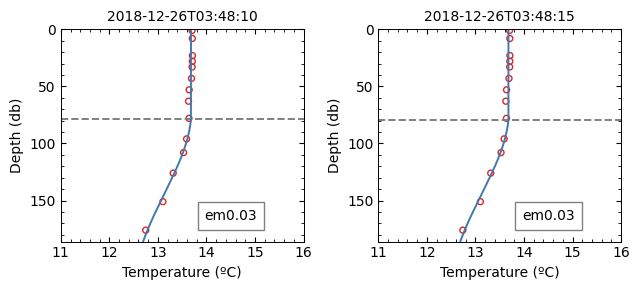

----
0.4345199179869278 0.4376222321357081


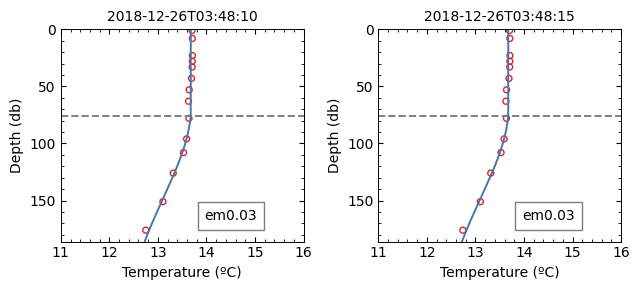

thrsh 0.6754251879300756 0.683813235705657
0.5204735581159985 0.6676879479689015


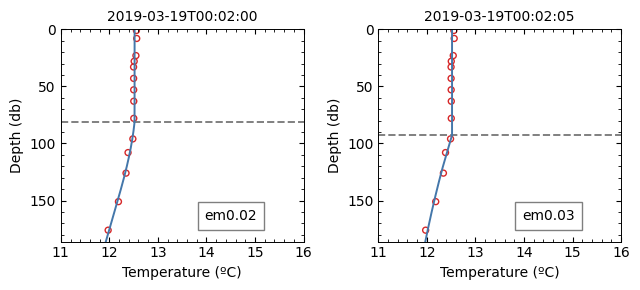

----


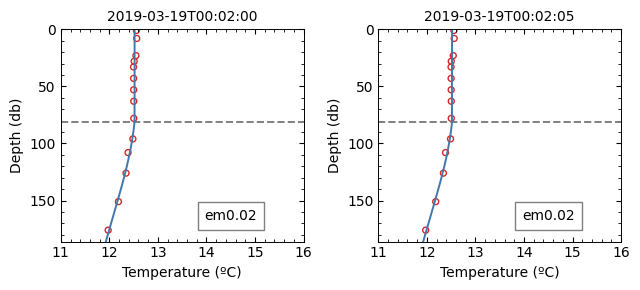

----
0.5319700930455389 0.5436080915302799


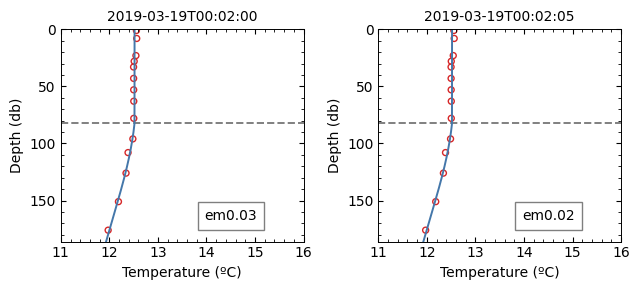

thrsh 0.6392306686180349 0.6451779416865356
0.6309600480704005 0.2803563257142363


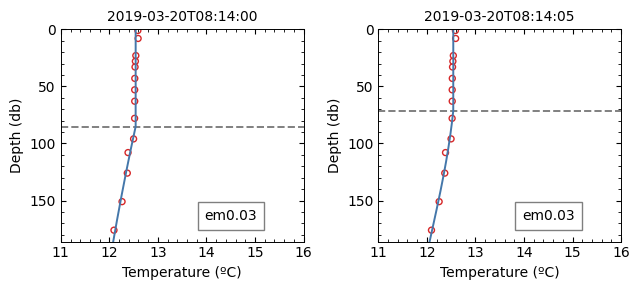

----


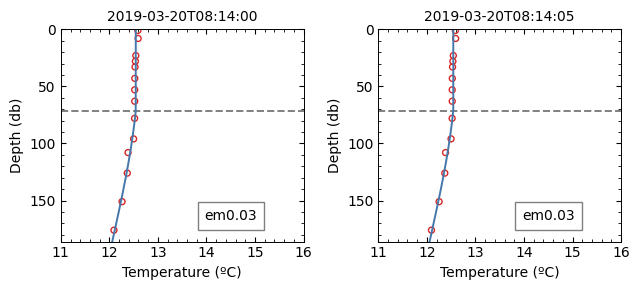

----
0.469569530223623 0.4671620520725255


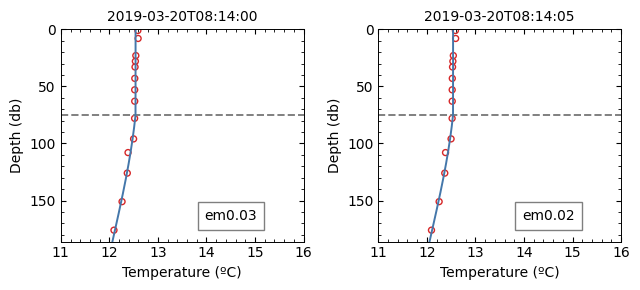

thrsh 0.7889935095851099 0.7953715182806202
0.6477917703698288 0.9026502525496812


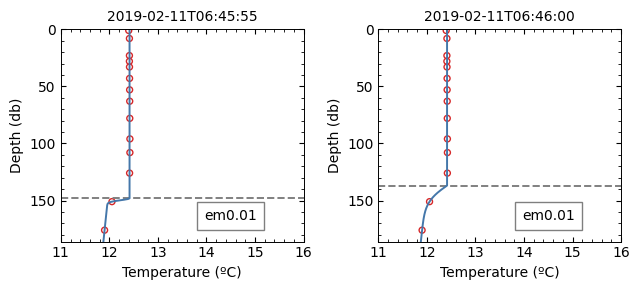

----


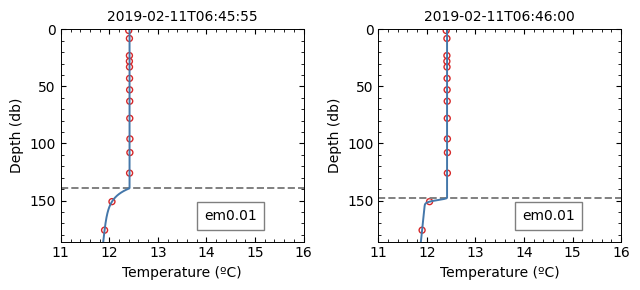

----
0.9631877817313697 0.9589228946693352


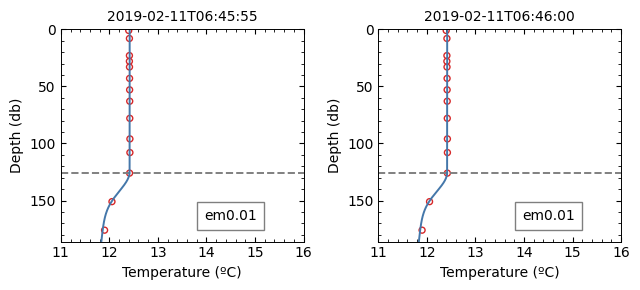

thrsh 0.7591469981193857 0.763095787146952
0.6636025741683944 0.8782657711265542


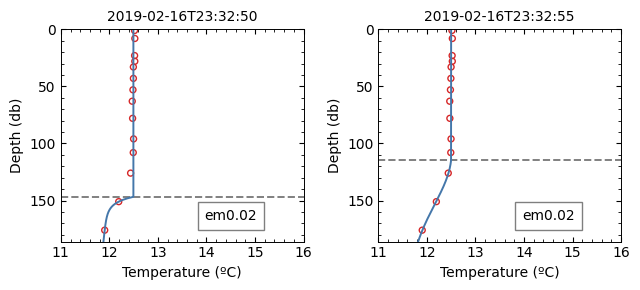

----


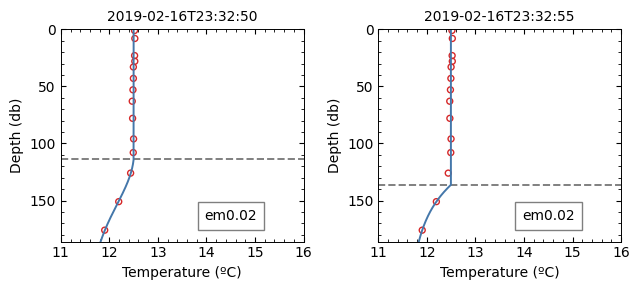

----
0.886378023031755 0.8817008220597174


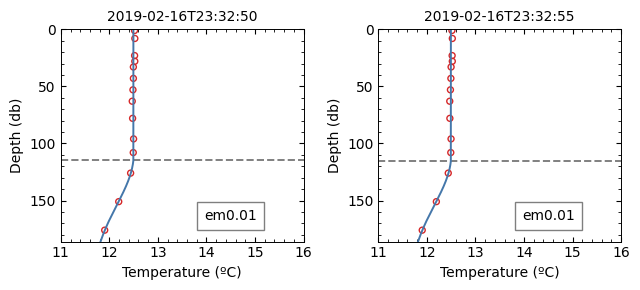

thrsh 0.9248898520797572 0.9270211037026552
0.9486551224741636 0.978917061612908


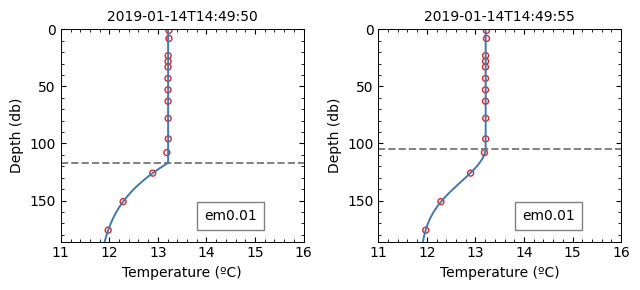

----


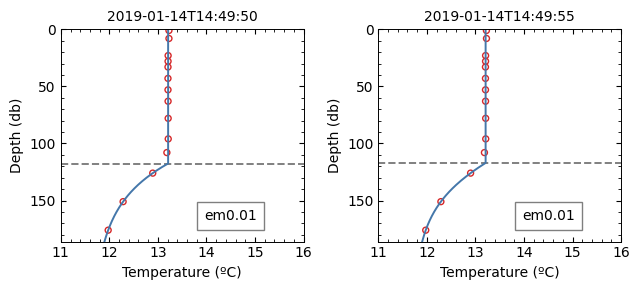

----
0.9787235134214338 0.978917061612908


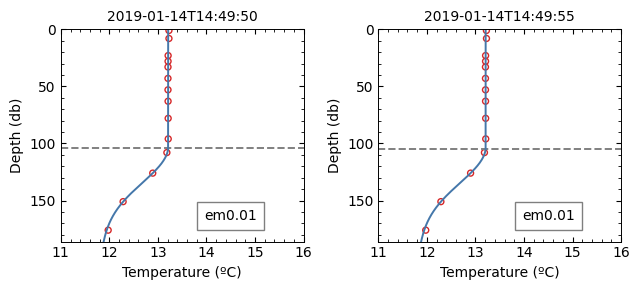

thrsh 0.7330413824188806 0.7403245713702604
0.2417067740173226 0.545393830499676


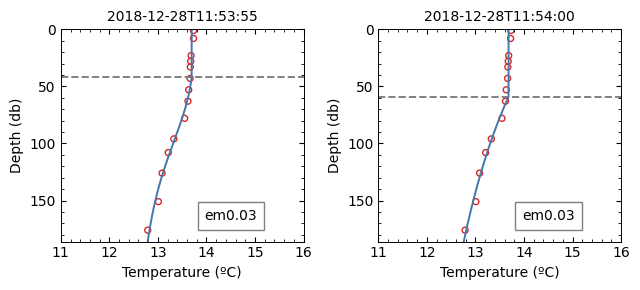

----


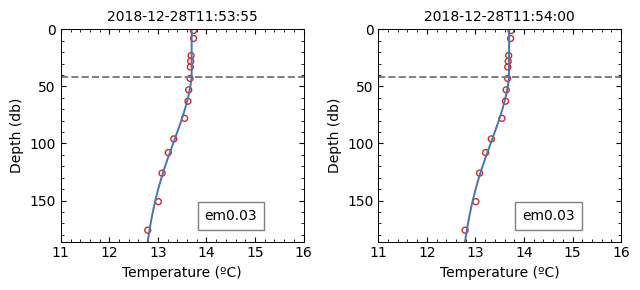

----
0.3053377220931348 0.3513736942241241


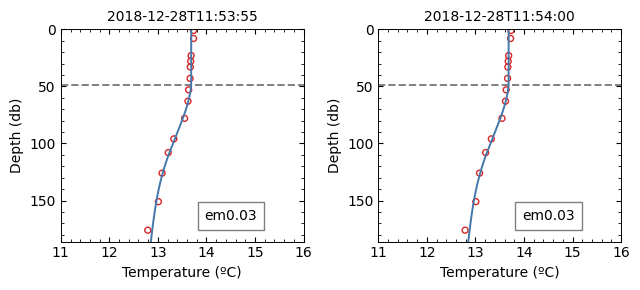

thrsh 0.7803670577827327 0.7774169654253509
0.6359112702497244 0.2530213046775118


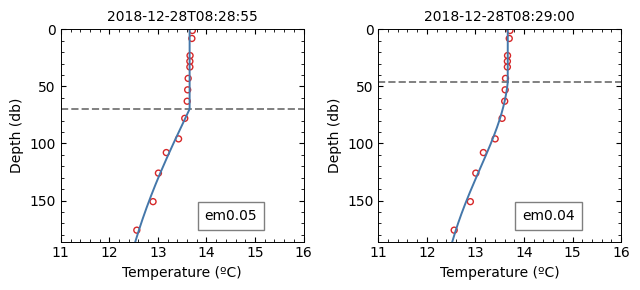

----


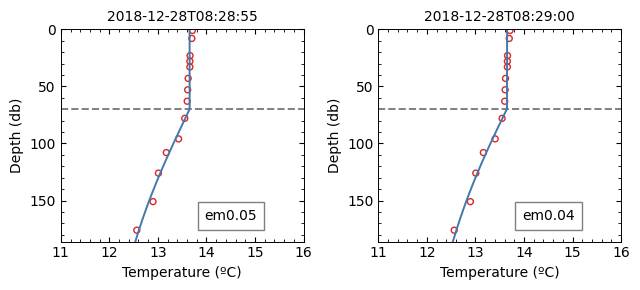

----
0.6621719277033256 0.683690740280065


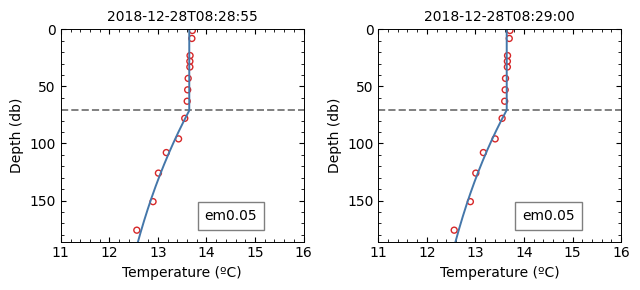

thrsh 0.6488007234321587 0.6388593308949335
0.5322408306865071 0.6704610503930293


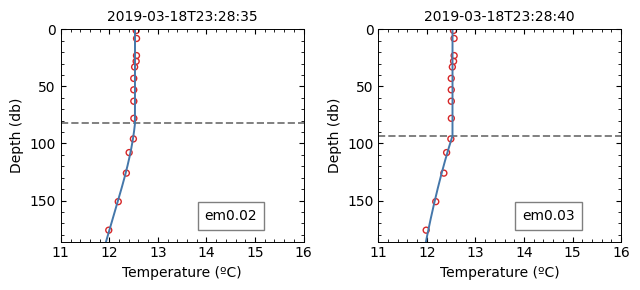

----


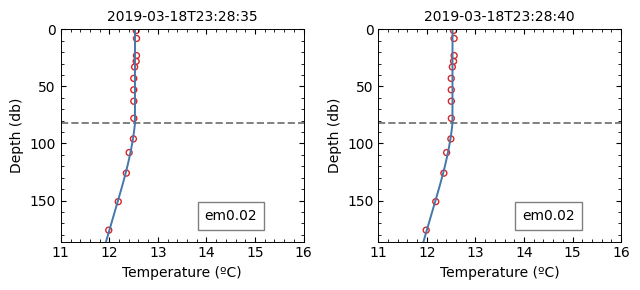

----
0.5646990336936163 0.5456292329111483


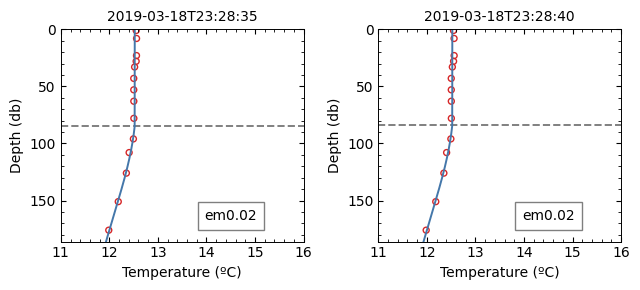

thrsh 0.5715176996075826 0.6139401695123511
0.280694556165421 0.1242556913688189


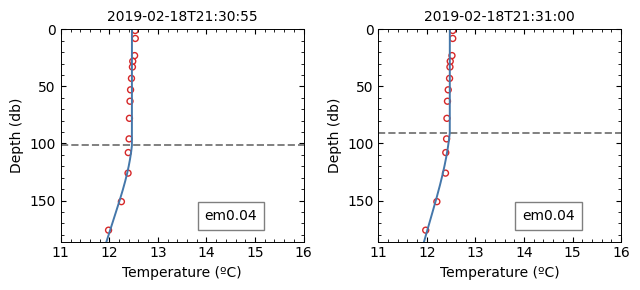

----


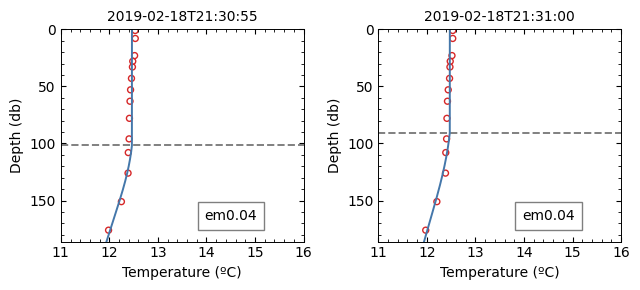

----
0.485592061877965 0.4660963067960317


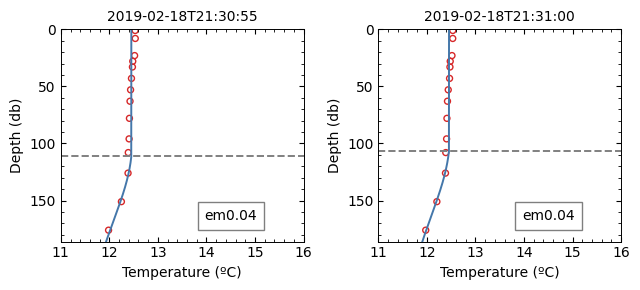

In [206]:
b = np.random.choice(locs_10_s, 20)
for i in b:
    print('thrsh', QI_itrsh.x.iloc[i], QI_itrsh.x.iloc[i+1])
    print(QI_is.x.iloc[i], QI_is.x.iloc[i+1])
    plot_multiple_profiles(df_s, data, [i,i+1])
    print('----')
    plot_multiple_profiles(df_c, data, [i, i+1])
    print('----')
    print(QI_ici.x.iloc[i], QI_ici.x.iloc[i+1])
    plot_multiple_profiles(df_ci, data, [i,i+1])

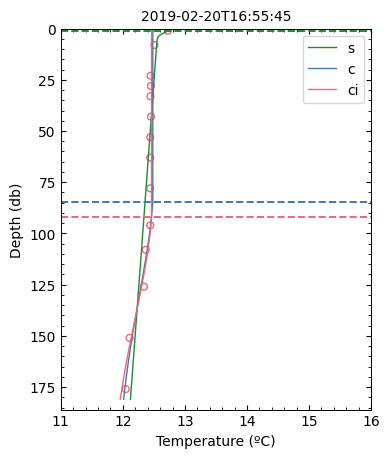

In [191]:
a = np.random.randint(0, len(df_s) - 1)
compare_fit_modes_profile(df_s, df_c, df_ci, data, a)

In [71]:
a

385048

In [45]:
a

762235

In [32]:
em_dif_large_s = distance(df_s, 'em', 1, 0.04)[0]
em_bigger_ci = np.where(em_ci - df_s['em'] > em_ci.std())[0]

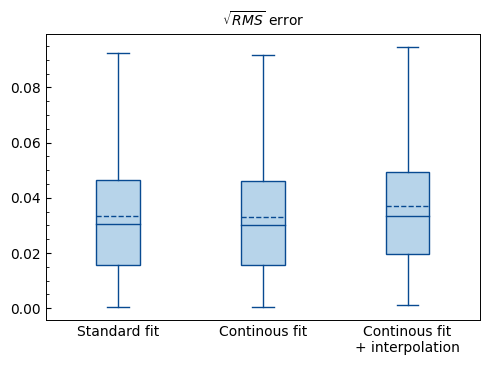

In [20]:
fig, ax = plt.subplots()
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))
bp = ax.boxplot([df_s['em'], df_c['em'], em_ci], showfliers=False, patch_artist=True, meanline=True, showmeans=True, 
                boxprops=dict(facecolor=colors[0], color=colors[2]), 
                medianprops=dict(color=colors[2]), 
                meanprops=dict(color=colors[2]),
                capprops=dict(color=colors[2]),
                whiskerprops=dict(color=colors[2]))
                
ax.tick_params(which='both', bottom=False, right=False, top=False)
ax.set_xticklabels(['Standard fit', 'Continous fit', 'Continous fit\n+ interpolation'])
ax.set_title(r'$\sqrt{RMS}$ error')
fig.tight_layout()
plt.show()

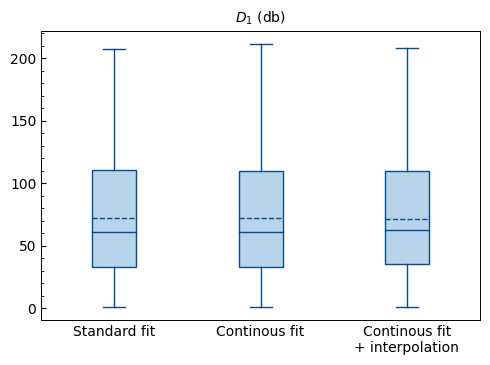

In [14]:
fig, ax = plt.subplots()
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))
bp = ax.boxplot([df_s['D1'], df_c['D1'], df_ci['D1']], showfliers=True, patch_artist=True, meanline=True, showmeans=True, 
                boxprops=dict(facecolor=colors[0], color=colors[2]), 
                medianprops=dict(color=colors[2]), 
                meanprops=dict(color=colors[2]),
                capprops=dict(color=colors[2]),
                whiskerprops=dict(color=colors[2]))
                
ax.tick_params(which='both', bottom=False, right=False, top=False)
ax.set_xticklabels(['Standard fit', 'Continous fit', 'Continous fit\n+ interpolation'])
ax.set_title(r'$D_1$ (db)')
fig.tight_layout()
plt.show()

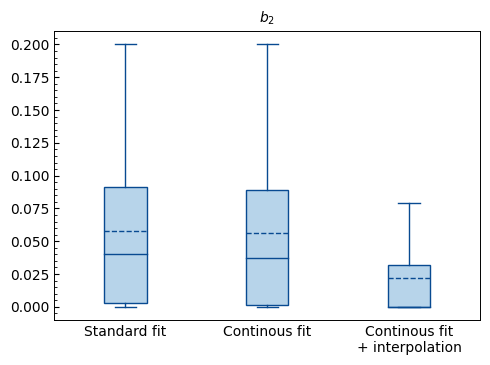

In [163]:
fig, ax = plt.subplots()
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))
bp = ax.boxplot([df_s['b2'], df_c['b2'], df_ci['b2']], showfliers=False, patch_artist=True, meanline=True, showmeans=True, 
                boxprops=dict(facecolor=colors[0], color=colors[2]), 
                medianprops=dict(color=colors[2]), 
                meanprops=dict(color=colors[2]),
                capprops=dict(color=colors[2]),
                whiskerprops=dict(color=colors[2]))
                
ax.tick_params(which='both', bottom=False, right=False, top=False)
ax.set_xticklabels(['Standard fit', 'Continous fit', 'Continous fit\n+ interpolation'])
ax.set_title(r'$b_2$')
fig.tight_layout()
plt.show()

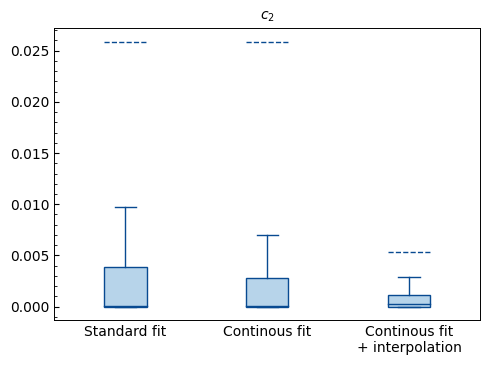

In [167]:
fig, ax = plt.subplots()
colors = plt.cm.Blues(np.linspace(0.3, 0.9, 3))
bp = ax.boxplot([df_s['c2'], df_c['c2'], df_ci['c2']], showfliers=False, patch_artist=True, meanline=True, showmeans=True, 
                boxprops=dict(facecolor=colors[0], color=colors[2]), 
                medianprops=dict(color=colors[2]), 
                meanprops=dict(color=colors[2]),
                capprops=dict(color=colors[2]),
                whiskerprops=dict(color=colors[2]))
                
ax.tick_params(which='both', bottom=False, right=False, top=False)
ax.set_xticklabels(['Standard fit', 'Continous fit', 'Continous fit\n+ interpolation'])
ax.set_title(r'$c_2$')
fig.tight_layout()
plt.show()

In [177]:
QI_ci = np.load(data_dir / 'SHDR_fit' / 'aux' / 'QI_ci_20181116.npy')
QI_ci_i = np.load(data_dir / 'SHDR_fit' / 'aux' / 'QI_ci_i_20181116.npy')
QI_c = np.load(data_dir / 'SHDR_fit' / 'aux' / 'QI_c_20181116.npy')
QI_s = np.load(data_dir / 'SHDR_fit' / 'aux' / 'QI_s_20181116.npy')
QI_s_i = np.load(data_dir / 'SHDR_fit' / 'aux' / 'QI_s_i_20181116.npy')


0.8745855373564131
0.8781039186843932
0.8825600627586061
0.8826279261417992
nan


/tmp/ipykernel_17703/40009313.py:5: RuntimeWarning: Mean of empty slice
  print(np.nanmean(QI_s_i[:1000000]))


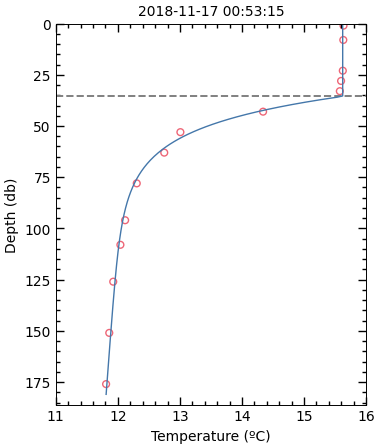

In [178]:
print(np.nanmean(QI_ci[:1000000]))
print(np.nanmean(QI_ci_i[:1000000]))
print(np.nanmean(QI_c[:1000000]))
print(np.nanmean(QI_s[:1000000]))
print(np.nanmean(QI_s_i[:1000000]))


plot_profile_fit(df_ci, temp, pres, 9999)

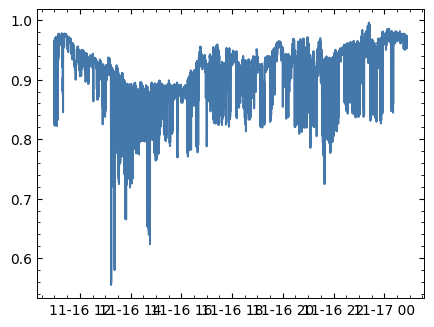

In [14]:
plt.plot(date[:10000], QI_s_i[:10000])